# Biological Data Clustering

In [1]:
from sklearn.decomposition import PCA ,IncrementalPCA,KernelPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from matplotlib.colors import LogNorm
from sklearn.mixture import GaussianMixture as GMM
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
df = pd.read_csv('Leukemia_GSE9476.csv')

In [3]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,1,2,7.745245,7.811210,6.477916,8.841506,4.546941,7.957714,5.344999,4.673364,...,5.058849,6.810004,12.800060,12.718612,5.391512,4.666166,3.974759,3.656693,4.160622,4.139249
1,12,2,8.087252,7.240673,8.584648,8.983571,4.548934,8.011652,5.579647,4.828184,...,4.436153,6.751471,12.472706,12.333593,5.379738,4.656786,4.188348,3.792535,4.204414,4.122700
2,13,2,7.792056,7.549368,11.053504,8.909703,4.549328,8.237099,5.406489,4.615572,...,4.392061,6.086295,12.637384,12.499038,5.316604,4.600566,3.845561,3.635715,4.174199,4.067152
3,14,2,7.767265,7.094460,11.816433,8.994654,4.697018,8.283412,5.582195,4.903684,...,4.633334,6.375991,12.903630,12.871454,5.179951,4.641952,3.991634,3.704587,4.149938,3.910150
4,15,2,8.010117,7.405281,6.656049,9.050682,4.514986,8.377046,5.493713,4.860754,...,5.305192,6.700453,12.949352,12.782515,5.341689,4.560315,3.887020,3.629853,4.127513,4.004316


## Preparing The Data

### Standardize features

In [4]:
df =  StandardScaler().fit_transform(df) 
df.shape

(64, 22285)

### Incremental principal components analysis

In [5]:
pca = IncrementalPCA() 
df = pca.fit_transform(df) 
df.shape

(64, 64)

## Building GMM 

In [6]:
mdl = GMM(n_components=5)
mdl.fit(df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

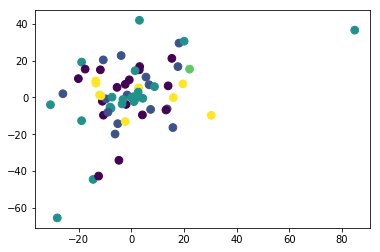

In [7]:
labels = mdl.predict(df)
plt.scatter(df[0], df[1], c=labels, s=60, cmap='viridis');

## Validation with Silhoutte Score

In [8]:
silhouette_avg = silhouette_score(df, labels)
print(silhouette_avg)

0.11240836665407213


In [9]:
sample_silhouette_values = silhouette_samples(df,labels)
print(sample_silhouette_values)

[ 0.1132137   0.14799685  0.17183996  0.16133398  0.13515761  0.13982217
  0.11779669  0.13707802  0.06511293  0.17935599  0.17271636  0.16706155
  0.08754296  0.14975805  0.11022591  0.10908798  0.17022097  0.16537533
 -0.03009207  0.07643253  0.03695021  0.04079492  0.01067434  0.16478251
  0.          0.02180125  0.10927256  0.18210778  0.08463671 -0.0352762
  0.07493937  0.03818166 -0.04911403  0.06667476 -0.04583866  0.10557564
  0.17560264  0.08595752  0.05038844  0.08248368 -0.03414767  0.0468759
  0.06293413 -0.05401557  0.26185073  0.21453709  0.11659788  0.08657699
  0.10852633  0.21924098  0.1591168   0.07344668  0.19262107  0.25111288
  0.18327718  0.19622131  0.17534538  0.0979472   0.1869507   0.16295525
  0.16133649  0.20315191  0.20233271  0.17171055]
